In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("../data/movie_ratings.csv")
df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
2,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998
3,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Mystery,1998
4,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Thriller,1998


In [30]:
print(df.shape)

(212595, 13)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212595 entries, 0 to 212594
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      212595 non-null  int64  
 1   movie_id     212595 non-null  int64  
 2   rating       212595 non-null  int64  
 3   timestamp    212595 non-null  object 
 4   age          212595 non-null  int64  
 5   gender       212595 non-null  object 
 6   occupation   212595 non-null  object 
 7   zip_code     212595 non-null  object 
 8   title        212595 non-null  object 
 9   year         212559 non-null  float64
 10  decade       212559 non-null  float64
 11  genres       212595 non-null  object 
 12  rating_year  212595 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 21.1+ MB


In [32]:
df.describe()

,user_id,movie_id,rating,age,year,decade,rating_year
count,212595.000000,212595.000000,212595.000000,212595.000000,212559.000000,212559.000000,212595.000000
mean,464.525643,390.545173,3.551048,32.771382,1987.563105,1982.602148,1997.469282
std,267.294662,312.312060,1.119645,11.452661,13.990727,13.687463,0.499057
min,1.000000,1.000000,1.000000,7.000000,1922.000000,1920.000000,1997.000000
25%,255.000000,164.000000,3.000000,24.000000,1984.000000,1980.000000,1997.000000
50%,450.000000,293.000000,4.000000,30.000000,1994.000000,1990.000000,1997.000000
75%,688.000000,568.000000,4.000000,40.000000,1996.000000,1990.000000,1998.000000
max,943.000000,1682.000000,5.000000,73.000000,1998.000000,1990.000000,1998.000000


In [33]:
# The dataset is clean, except 36 missing values in year and decade, which I chose to ignore.
df.isna().sum()

user_id         0
movie_id        0
rating          0
timestamp       0
age             0
gender          0
occupation      0
zip_code        0
title           0
year           36
decade         36
genres          0
rating_year     0
dtype: int64

In [34]:
# Great no duplicates!
df.duplicated().sum()

np.int64(0)

In [35]:
df.genres.value_counts()

genres
Drama          39895
Comedy         29832
Action         25589
Thriller       21872
Romance        19461
Adventure      13753
Sci-Fi         12730
War             9398
Crime           8055
Children        7182
Horror          5317
Mystery         5245
Musical         4954
Animation       3605
Western         1854
Film-Noir       1733
Fantasy         1352
Documentary      758
unknown           10
Name: count, dtype: int64

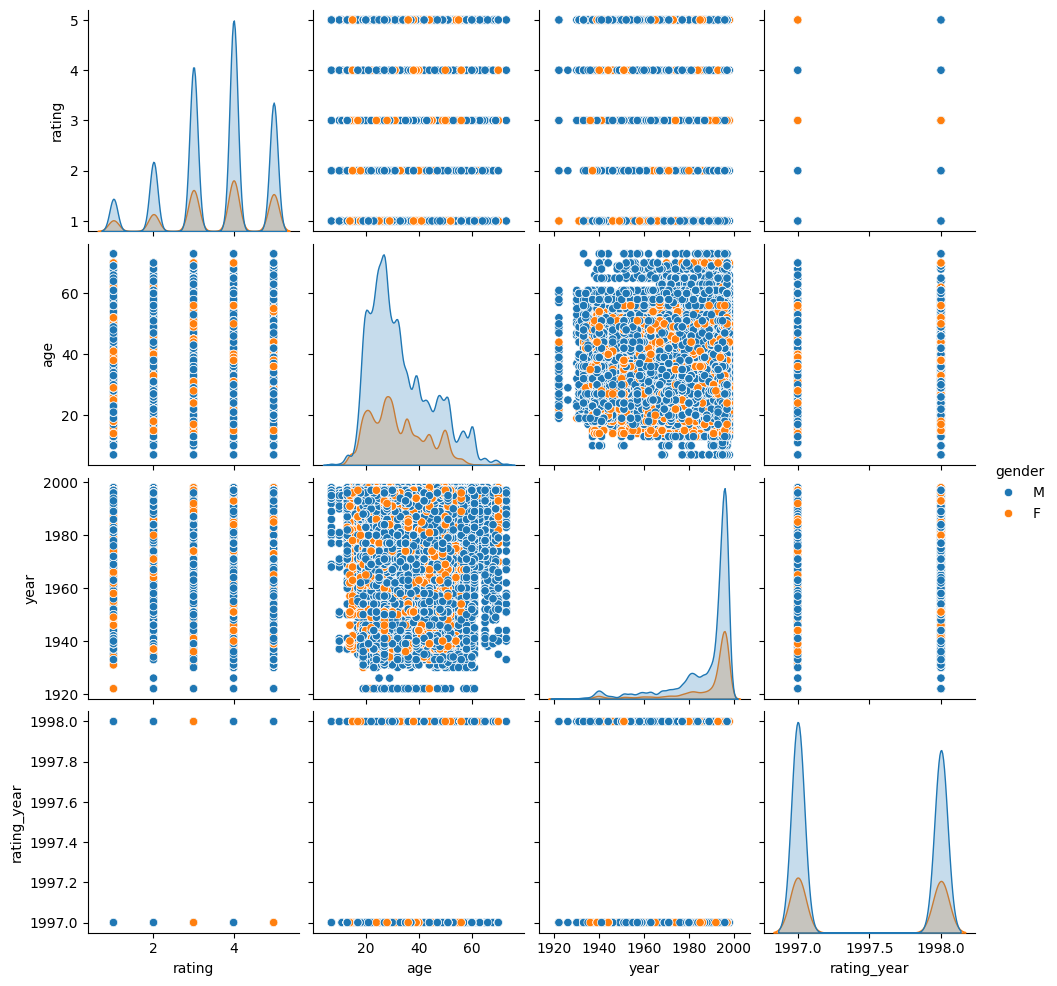

In [37]:
# Doing more EDA through visualization.
# Created a pairplot with gender as hue, but did not see any clear trend or useful insight.

sns.pairplot(
    df,
    vars=["rating", "age", "year", "rating_year"],
    hue="gender"
)
plt.show()

/tmp/ipykernel_35831/3036132303.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=df, palette="viridis")


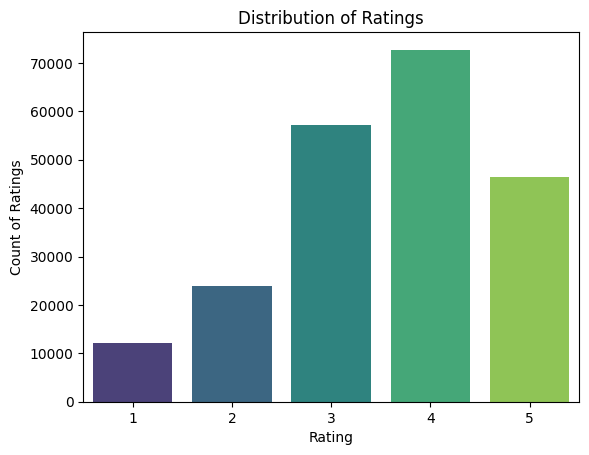

In [38]:
# The ratings form a somewhat normal distribution with a slight left skew.
# Most ratings are 3 and 4, while fewer ratings are 1, 2, or 5.

plt.figure()
sns.countplot(x="rating", data=df, palette="viridis")

plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count of Ratings")
plt.show()

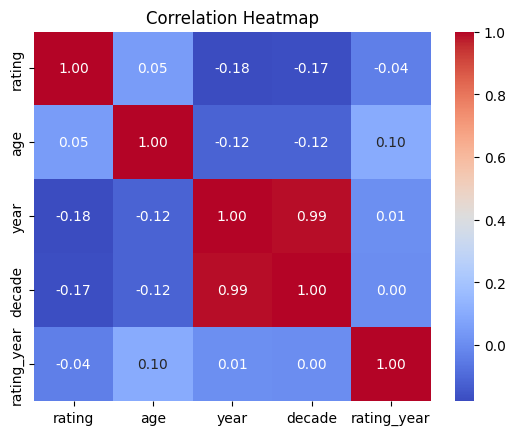

In [39]:
# Year and decade have a very strong correlation (0.99) since decade is derived from year.

# Ratings show a small negative correlation with release year (-0.18),
# likely because older movies are rated slightly higher, but more statistical testing is needed to confirm its validity.

# Correlation matrix
corr = df_corr.corr()

# Plot heatmap
plt.figure()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

plt.title("Correlation Heatmap")
plt.show()

/tmp/ipykernel_35831/813537902.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_movies.index, x=top_movies.values, palette="viridis")


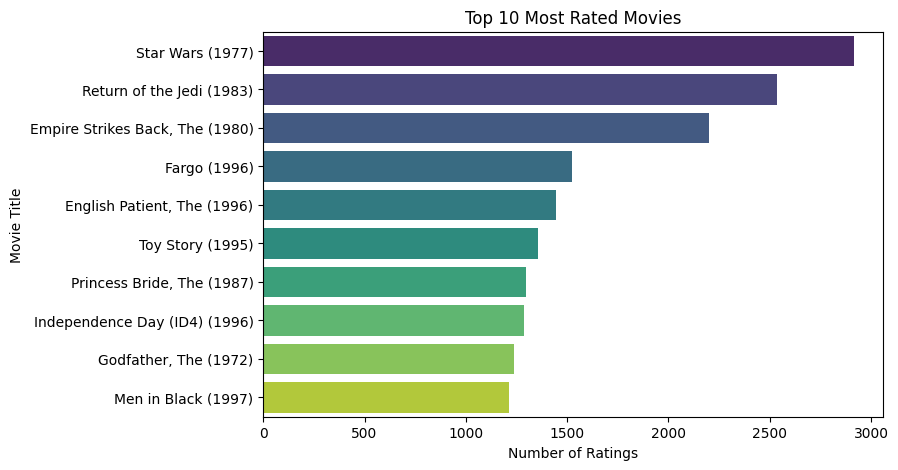

In [40]:
# Star Wars (1977) is the most rated movie, with other Star Wars titles also in the top 3.
# Many top movies are from the 1990s, reflecting the dataset's late-1990s timeframe

top_movies = df["title"].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=top_movies.index, x=top_movies.values, palette="viridis")
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.show()


## Questions to Answer

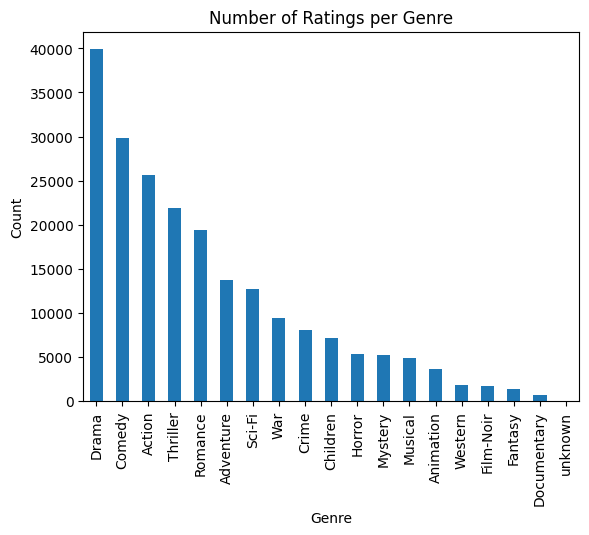

In [ ]:
# Q1: What's the breakdown of genres for the movies that were rated?

# Drama and Comedy have the most ratings, followed by Action and Thriller.
# Genres like Documentary and Film-Noir have very few ratings.

df["genres"].value_counts().plot(kind="bar")
plt.title("Number of Ratings per Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [ ]:
# Q2: Which genres have the highest viewer satisfaction (highest ratings)?

# Film-Noir and War have the highest average ratings.
# Drama is also rated pretty high with a large number of people.
# This means most people in general like Drama movies, while a smaller group really likes Film-Noir and War.

genre_stats = (
    df.groupby("genres")["rating"]
      .agg(["count", "mean"])
      .reset_index()
      .rename(columns={"count":"n_ratings", "mean":"avg_rating"})
)

# Filter out small genres 
genre_stats = genre_stats[genre_stats["n_ratings"] >= 50]

# Sort by average rating
genre_stats = genre_stats.sort_values("avg_rating", ascending=False)

genre_stats.head(10)   


,genres,n_ratings,avg_rating
9,Film-Noir,1733,3.921523
16,War,9398,3.815812
7,Drama,39895,3.687379
6,Documentary,758,3.672823
12,Mystery,5245,3.638132
5,Crime,8055,3.632278
13,Romance,19461,3.621705
17,Western,1854,3.613269
2,Animation,3605,3.576699
14,Sci-Fi,12730,3.560723


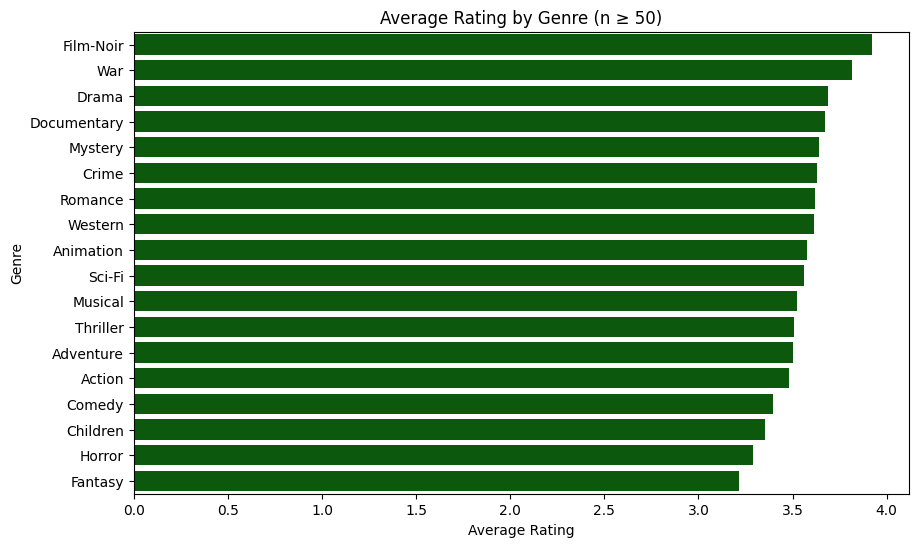

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=genre_stats,
    x="avg_rating",
    y="genres",
    color="darkgreen"  
)

plt.title("Average Rating by Genre (n ≥ 50)")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()



In [ ]:
# Q3: How does mean rating change across movie release years?

''' There are some outliers where the line jumps or drops drastically, likely because only a few movies
were released or rated in those years, possibly due to world events. One clear outlier is 1926 
(avg rating = 3.0, only 2 ratings), which caused the line to drop sharply. In general, ratings 
trend staright with some fluctuations, but after 1980 we can see a slight negative shift where 
average ratings start to go down slowly. '''

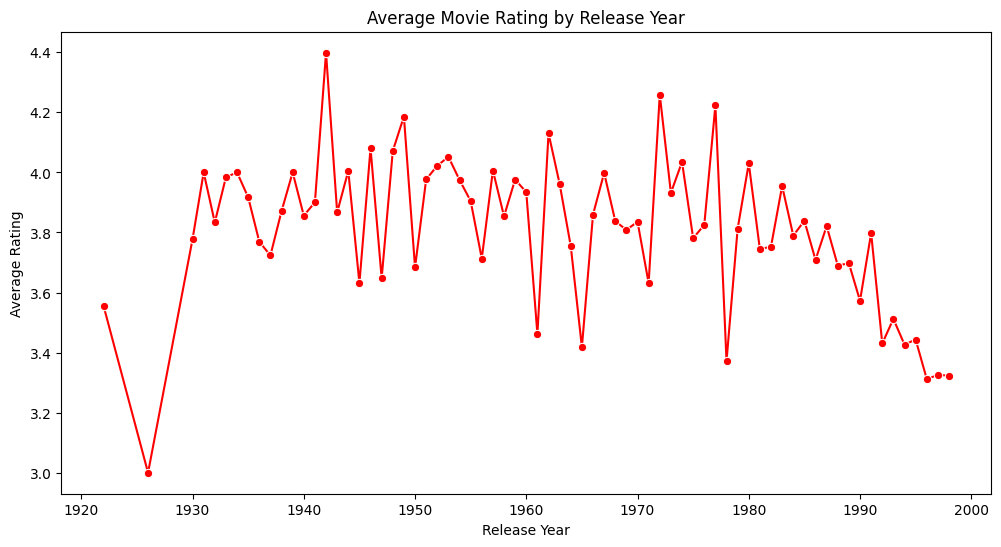

In [68]:
# Mean rating by release year
yearly_ratings = df.groupby("year")["rating"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_ratings, x="year", y="rating", marker="o", color="red")

plt.title("Average Movie Rating by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.show()


In [74]:
bottom5 = (
    df.groupby("year")
      .agg(avg_rating=("rating","mean"),
           n_ratings=("rating","count"))
      .reset_index()
      .sort_values("avg_rating")
      .head(5)
)
bottom5



,year,avg_rating,n_ratings
1,1926.0,3.000000,2
68,1996.0,3.312172,37505
70,1998.0,3.323529,1938
69,1997.0,3.325326,33760
50,1978.0,3.371367,929


In [75]:
top5 = (
    df.groupby("year")
      .agg(avg_rating=("rating","mean"),
           n_ratings=("rating","count"))
      .reset_index()
      .sort_values("avg_rating", ascending=False)
      .head(5)
)
top5

,year,avg_rating,n_ratings
14,1942.0,4.398467,783
44,1972.0,4.258887,1294
49,1977.0,4.222897,3459
21,1949.0,4.186047,172
34,1962.0,4.130000,1000


In [ ]:
# Q4: What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?

'''
The top 4 movies stay the same in both plots (A Close Shave, Schindler's List,
The Wrong Trousers, Casablanca). The only change is the 5th spot:
with ≥ 50 ratings it's Wallace & Gromit (1996), but with ≥ 150 ratings
it gets replaced by The Shawshank Redemption (1994).
'''


In [82]:
# Average rating + number of ratings per movie
movie_stats = (
    df.groupby("title")["rating"]
      .agg(avg_rating="mean", n_ratings="count")
      .reset_index()
)

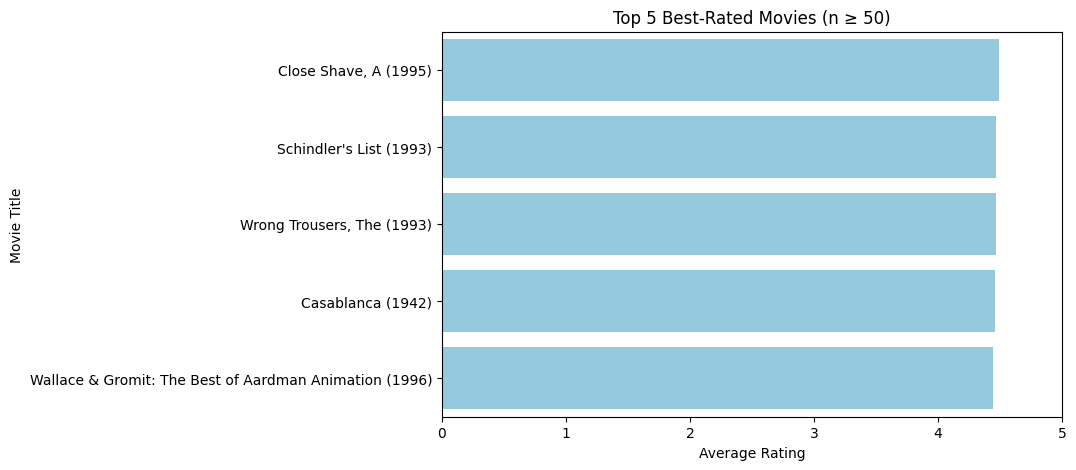

In [86]:
top5_50 = (
    movie_stats[movie_stats["n_ratings"] >= 50]
    .sort_values("avg_rating", ascending=False)
    .head(5)
)

plt.figure(figsize=(8,5))
sns.barplot(data=top5_50, y="title", x="avg_rating", color="skyblue")
plt.title("Top 5 Best-Rated Movies (n ≥ 50)")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.xlim(0,5)
plt.show()


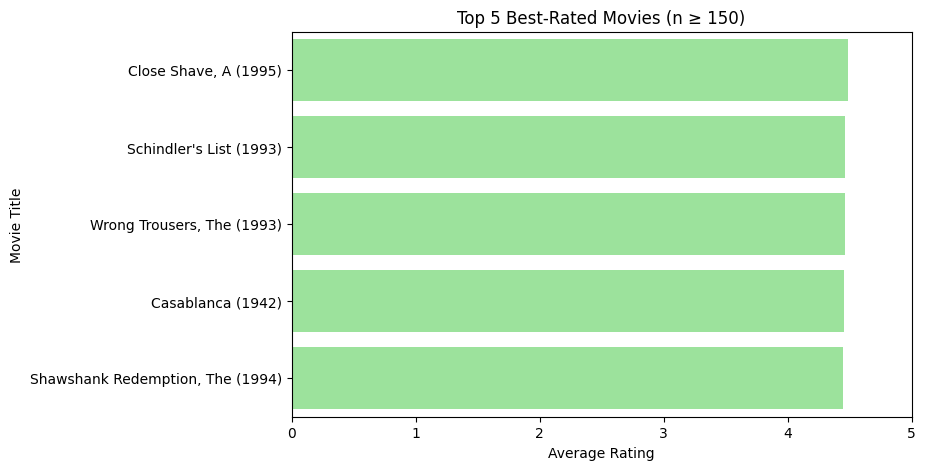

In [85]:
top5_150 = (
    movie_stats[movie_stats["n_ratings"] >= 150]
    .sort_values("avg_rating", ascending=False)
    .head(5)
)

plt.figure(figsize=(8,5))
sns.barplot(data=top5_150, y="title", x="avg_rating", color="lightgreen")
plt.title("Top 5 Best-Rated Movies (n ≥ 150)")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.xlim(0,5)
plt.show()


In [ ]:
# Q6: Plot number of ratings vs mean rating per genre. Is there a correlation between the volume of ratings and mean rating?

'''
There is almost no correlation between the number of ratings and the average rating (corr ≈ 0.08).
This means that popular genres (with many ratings like Drama, Comedy, Action) are not necessarily
rated higher than niche genres. In fact, average ratings across genres mostly stay between 3.3–3.9,
regardless of how many ratings they received.
'''


In [91]:
# Number of ratings and average rating per genre
genre_stats = (
    df.groupby("genres")["rating"]
      .agg(n_ratings="count", avg_rating="mean")
      .reset_index()
)
genre_stats.head()

,genres,n_ratings,avg_rating
0,Action,25589,3.480245
1,Adventure,13753,3.503527
2,Animation,3605,3.576699
3,Children,7182,3.353244
4,Comedy,29832,3.394073


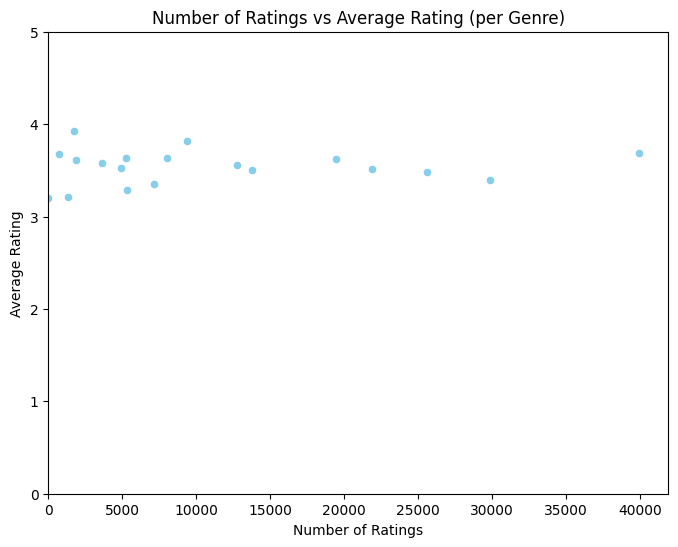

In [88]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=genre_stats, x="n_ratings", y="avg_rating", color="skyblue")

plt.title("Number of Ratings vs Average Rating (per Genre)")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.xlim(0, genre_stats["n_ratings"].max() + 2000)
plt.ylim(0, 5)
plt.show()


In [94]:
corr = genre_stats["n_ratings"].corr(genre_stats["avg_rating"])
print("Correlation between number of ratings and average rating:", corr)


Correlation between number of ratings and average rating: 0.07708120449703999
